In [1]:
!pip install easyocr
!pip install imutils


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Python310\\share'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.



  Using cached torch-2.0.0-cp310-cp310-win_amd64.whl (172.3 MB)
  Using cached requests-2.28.2-py3-none-any.whl (62 kB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
  Using cached certifi-2022.12.7-py3-none-any.whl (155 kB)
  Using cached idna-3.4-py3-none-any.whl (61 kB)
  Using cached urllib3-1.26.15-py2.py3-none-any.whl (140 kB)
  Using cached imageio-2.27.0-py3-none-any.whl (3.4 MB)
  Using cached lazy_loader-0.2-py3-none-any.whl (8.6 kB)
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.0.0
    Uninstalling Pillow-9.0.0:
      Successfully uninstalled Pillow-9.0.0
  Using cached imutils-0.5.4-py3-none-any.whl


ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'C:\\Python310\\Scripts\\range-detector'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

ModuleNotFoundError: No module named 'easyocr'

In [3]:
pip install easyocr

  Using cached easyocr-1.6.2-py3-none-any.whl (2.9 MB)
     ---------------------------------------- 95.1/95.1 kB 1.4 MB/s eta 0:00:00Note: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 1.4/1.4 MB 934.9 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: c:\users\dell\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip


     ---------------------------------------- 1.2/1.2 MB 2.9 MB/s eta 0:00:00
     -------------------------------------- 172.3/172.3 MB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 35.0/35.0 MB 3.1 MB/s eta 0:00:00
  Using cached ninja-1.11.1-py2.py3-none-win_amd64.whl (313 kB)
  Using cached python_bidi-0.4.2-py2.py3-none-any.whl (30 kB)
  Using cached sympy-1.11.1-py3-none-any.whl (6.5 MB)
  Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)


In [4]:
import easyocr

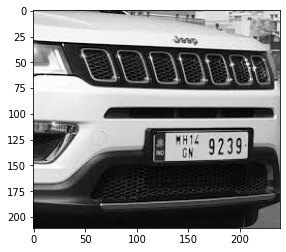

In [30]:
img = cv2.imread('image7.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

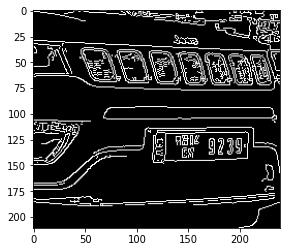

In [31]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [32]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [33]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [34]:
location

array([[[116, 121]],

       [[116, 147]],

       [[207, 143]],

       [[205, 117]]], dtype=int32)

In [35]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

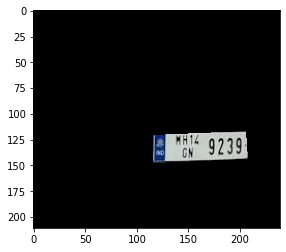

In [36]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [38]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

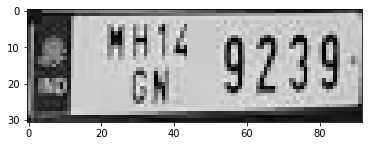

In [39]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [41]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[50, 2], [92, 2], [92, 28], [50, 28]], '9239', 0.8986740708351135)]

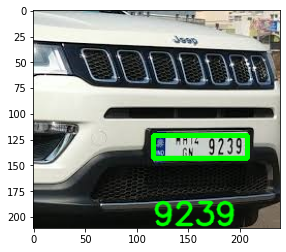

In [42]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))